In [1]:
import time
import random
from matplotlib import pyplot as plt

# Lists, Timing, and Performance

In this notebook we're going to explore the performance of lists. Specifically, we're going to see how the time it takes to perform a **membership check** on a list is affected by various properties of the list. A "membership check" is what you do when you write code like:

```python
my_list = [1,2,3]
if 3 in my_list:
    # we just checked my_list for membership
    # of the element 3 
```

Let's explore the following two questions in code:

1. When an element IS in a list, does the location of that element (near the beginning vs near the end) impact the time it takes to perform a membership check?

2. When an element IS NOT in a list, does the size of the list impact the time it takes to perform a membership check?

What we find will motivate a more in depth discussion about the tradeoffs between lists and other data structures.

In [2]:
# before we continue, make sure you understand 
# what we mean by "testing for membership" in a list. 

L = [1,2,3]
2 in L

True

In [3]:
L = [1,2,3]
4 in L

False

## Question 1
> Does position in list impact the time it takes to perform a membership test?

First we're going to need to figure out how to do these timings...

In [4]:
# let's make a small list to begin with
L = list(range(10))
print(L)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [7]:
# now let's time how long it takes to check for 
# membership of the very first element (0)...

element = 0

start_time = time.clock()

element in L     # this line of code looks weird 
                 # but it's valid python!

end_time =   time.clock()

# make sure you understand why the following code makes sense.
duration_in_seconds = end_time - start_time
milliseconds = duration_in_seconds * 1000

print(milliseconds, "milliseconds to find 0 in list")

0.07900000000016227 milliseconds to find 0 in list


In [8]:
# Run the above code a few times. You should notice that the time
# can change quite a bit. What we actually want is to conduct
# this experiment a bunch of times and find the average. 


L = list(range(1000)) # use a bigger list
element = 500         # look in the middle of the list
num_trials = 1000     # perform experiment many times

start = time.clock()
for _ in range(num_trials):
    element in L
end = time.clock()
secs = end-start
millis = secs * 1000
millis_per_check = millis/num_trials
print("on average, it took", millis_per_check, "ms per membership test")

on average, it took 0.015421000000000129 ms per membership test


In [9]:
# That's a useful bit of code! 
# Let's generalize it and turn it into a reusable function

def avg_millis_to_check_el_in_list(element, target_list, N=20):
    start = time.clock()
    for _ in range(N):
        element in target_list
    end = time.clock()
    return (end-start)*1000 / N

avg_millis = avg_millis_to_check_el_in_list(500, list(range(1000)))
print("on average, it took", avg_millis, "ms per membership test")

on average, it took 0.008099999999999774 ms per membership test


### Note - Take your time!
Make sure you take your time going through the next few cells. Try to really read through the code **before** you run it and try to make a prediction about what will happen...

In [10]:
# now we can compare time to lookup low numbers (near the 
# beginning of the list) vs higher numbers (near the end).

# Let's use a really big list this time
list_size = 1000000
L = list(range(list_size))

# Now make three separate timings...
T_beginning = avg_millis_to_check_el_in_list(1000, L)
T_middle    = avg_millis_to_check_el_in_list(500000, L)
T_end       = avg_millis_to_check_el_in_list(999999, L)

print("T_beginning: ", T_beginning)
print("T_middle:    ", T_middle)
print("T_end:       ", T_end)

T_beginning:  0.015849999999995035
T_middle:     7.889999999999998
T_end:        15.69545


Interesting! There's clearly a relationship. Let's see if we can dig deeper though. A [scatter plot](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.scatter.html) showing average time vs position in list might help us out here.

In [11]:
# Making a scatter plot of position in list (X-axis)
# vs. average time to find element (y-axis)

list_size = 100000
L = list(range(list_size))

# check between start and end in increments of 10000. This will
# be our X axis too!
positions = list(range(0, list_size, 10000))

# use list comprehension to generate Y-axis data!
millis = [avg_millis_to_check_el_in_list(pos, L) for pos in positions]

# first, let's look at the raw data
print("positions checked:", positions)
print("average millis:   ", millis)

positions checked: [0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000]
average millis:    [0.00029999999999752447, 0.1631000000000049, 0.3282999999999925, 0.4674999999999985, 0.6166000000000005, 0.7796499999999984, 0.9288999999999991, 1.128499999999999, 1.2384000000000062, 1.4024499999999995]


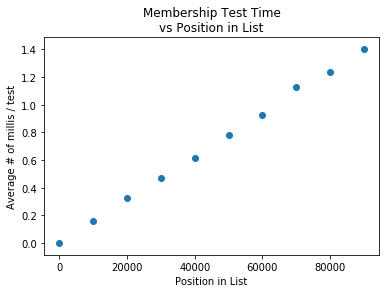

In [12]:
# now let's make the scatter plot!
X = positions 
Y = millis
plt.scatter(X, Y)
plt.title("Membership Test Time\nvs Position in List")
plt.xlabel("Position in List")
plt.ylabel("Average # of millis / test")
plt.show()

### Answer to Question 1
Yes! Where an element is in a list **definitely** impacts how long it takes to discover that the element exists in the list!

Elements near the beginning of a list are found very quickly. Elements near the end of the list take longer. 

--------

## Question 2 
> Does the size of a list impact the time it takes to test for membership of elements when they are NOT in the list?

In [13]:
# Let's jump right into writing a function

def avg_millis_to_test_for_non_existent_el(list_size, num_trials=20):
    # 1. prepare list and nonexistent element
    L = list(range(list_size))
    element = -1
    
    # 2. start the timer
    start = time.clock()
    
    # 3. repeat membership test num_trials times
    for _ in range(num_trials):
        element in L
    
    # 4. stop the timer
    end = time.clock()
    
    # 5. do the math and return the result
    millis_per_test = (end-start) * 1000 / num_trials
    return millis_per_test

In [14]:
# Let's use this function on lists of different sizes
small  = 10000
medium = 100000
large  = 1000000

T_small  = avg_millis_to_test_for_non_existent_el(small)
T_medium = avg_millis_to_test_for_non_existent_el(medium)
T_large  = avg_millis_to_test_for_non_existent_el(large)

print("T_small: ", T_small)
print("T_medium:", T_medium)
print("T_large: ", T_large)

T_small:  0.13165000000001648
T_medium: 1.3598500000000069
T_large:  13.614799999999994


Once again, we see that there IS a relationship... 

Let's make another scatter plot.

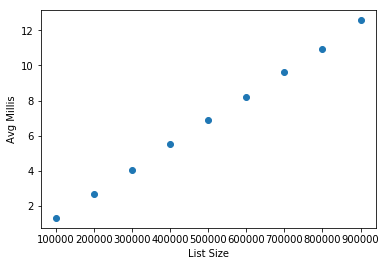

In [15]:
sizes = list(range(100000, 1000000, 100000))
times = [avg_millis_to_test_for_non_existent_el(s) for s in sizes]
plt.scatter(sizes, times)
plt.xlabel("List Size")
plt.ylabel("Avg Millis")
plt.show()

### Answer to Question 2
Yes! When checking for membership of an element in a list, itt takes longer to figure out an element **doesn't** exist in that list when the list is big.

### Next Steps
Either continue on or keep exploring more about lists and timing. If you do keep exploring and you find anything interesting be sure to share it in the group Slack channel!

In [ ]:
# TODO (optional) - keep exploring! 